In [1]:
#importing library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


__1. Importing Data__

In [2]:
#importing our brand new data set from 4.9 part 1
df = pd.read_pickle(r'/Users/rayruslijunior/11-2021 Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_cust(4.9).pkl')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196.0,1.0,Soda,77.0,7.0,9.000000,Regular customer,Mid-range product,Regularly busy days,Average orders,11,Regularly busy,6.367188,Low Spender,20,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084.0,2.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.500000,Regular customer,Mid-range product,Regularly busy days,Average orders,11,Regularly busy,6.367188,Low Spender,20,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427.0,3.0,Original Beef Jerky,23.0,19.0,4.398438,Regular customer,Low-range product,Regularly busy days,Average orders,11,Regularly busy,6.367188,Low Spender,20,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088.0,4.0,Aged White Cheddar Popcorn,23.0,19.0,4.699219,Regular customer,Low-range product,Regularly busy days,Average orders,11,Regularly busy,6.367188,Low Spender,20,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405.0,5.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.000000,Regular customer,Low-range product,Regularly busy days,Average orders,11,Regularly busy,6.367188,Low Spender,20,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


__2. Creating A Bar chart, Histogram, Scatterplot and a Line Chart__

__2.1 Bar Chart__

<AxesSubplot:>

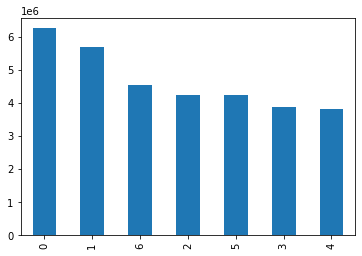

In [5]:
df['order_dow'].value_counts().plot.bar()

In [6]:
df['order_dow'].value_counts(dropna= False)

0    6252941
1    5696724
6    4530304
2    4243173
5    4236989
3    3868747
4    3812390
Name: order_dow, dtype: int64

In [7]:
df['order_dow'].value_counts(dropna= False).sort_index()

0    6252941
1    5696724
2    4243173
3    3868747
4    3812390
5    4236989
6    4530304
Name: order_dow, dtype: int64

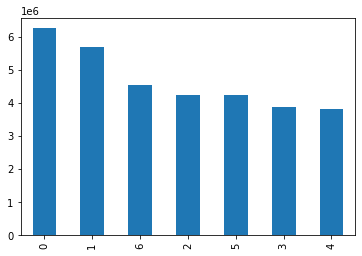

In [17]:
bar1 = df['order_dow'].value_counts().plot.bar()

__2.2. Histogram__

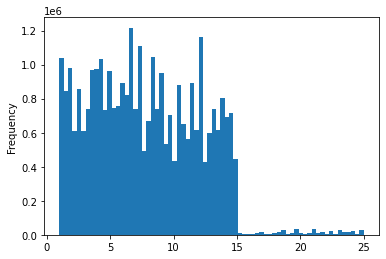

In [16]:
hist1 = df['prices'].plot.hist(bins = 70)

__2.3 Scatterplot__

<AxesSubplot:xlabel='prices', ylabel='prices'>

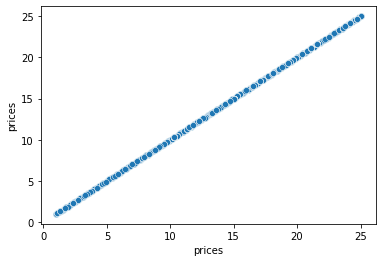

In [18]:
sns.scatterplot(x = 'prices', y = 'prices',data = df)

__2.4 Line Chart__

__2.4.1. Sampling__

In [20]:
#getting a sample of the data - setting random seed
np.random.seed(4)

In [21]:
# list storing boolean values
dev = np.random.rand(len(df)) <= 0.7

In [22]:
# split df in to two samples
big = df[dev]

In [23]:
small = df[~dev]

In [24]:
# double check if it contains all the data
len(df)

32641268

In [25]:
len(big) + len(small)

32641268

__2.4.2 Line Chart__

In [27]:
# creating smaller df to speed up processing
df_2 = small[['order_dow', 'prices']]

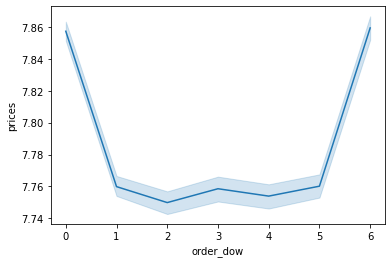

In [29]:
line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')

__3.You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.__

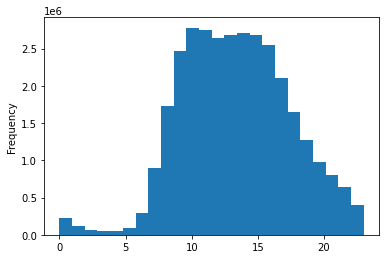

In [30]:
hist2 = df['order_hour_of_day'].plot.hist(bins = 24)

#This histogram shows us that highest number of orders submitted at Instacart happens during the day :-)

__4.The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.__

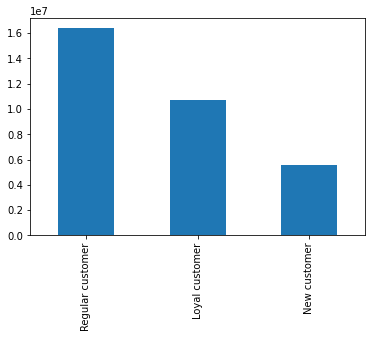

In [33]:
bar2 = df['frequency_flag'].value_counts().plot.bar()

__5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)__

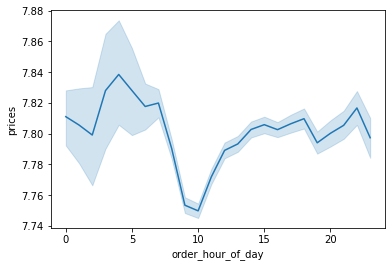

In [34]:
line_2 = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')

__6.Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents__

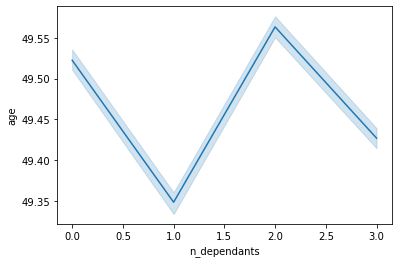

In [35]:
line_3 = sns.lineplot(data = df, x = 'n_dependants', y = 'age')

In [36]:
df['age'].mean()

49.4653546240912

This Instacart linechart shows the average number of dependants for customers who are the average age (49.47).

__7. Scatterplot__

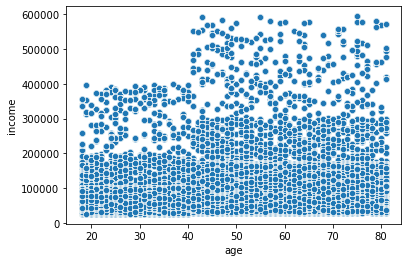

In [37]:
scatter = sns.scatterplot(data = df, x = 'age', y = 'income')

#Scatterplot shows a positive correlation of the higher the age, the more spending power this customer have :-)

__8 Export the visualization as png__

In [38]:
path = r'/Users/rayruslijunior/11-2021 Instacart Basket Analysis'

In [39]:
#orders_day_of_week bar
bar1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_day_of_week_bar.png'))

In [40]:
#histogram price
hist1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','price_histogram.png'))

In [41]:
#line chart order_dow - price
line.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','order_dow_price.png'))

In [42]:
#order hour of the day - sales
hist2.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','order_hour_sales.png'))

In [43]:
#Customer frequency
bar2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','customer_flag.png'))

In [45]:
#price and hour of the day
line_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','price_hour.png'))

In [46]:
#dependant and age correlation
line_3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependant_age.png'))

In [47]:
#scatterplot age and income
scatter.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_income.png'))

In [8]:
crosstab = pd.crosstab(df['days_since_prior_order'], df['order_number'], dropna = False)

In [11]:
crosstab

order_number,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,0,20564,20452,18313,16697,16280,14589,14063,12928,11619,...,1155,1042,939,1144,1104,1046,891,1046,941,137
1.0,0,31693,29975,28327,27335,25705,25198,23086,21938,21212,...,2813,2739,2615,2616,2651,2447,2550,2640,2371,321
2.0,0,46493,46302,44280,41040,41165,38336,37707,35950,34021,...,3568,3329,3605,3328,3082,2997,3065,3101,2621,329
3.0,0,61704,63454,60413,58256,56474,53167,49545,48529,48041,...,3246,2806,3089,2913,2652,2670,2475,2174,2474,223
4.0,0,76798,78925,74046,70980,66957,62751,61478,59801,57965,...,2266,2500,2044,1809,2089,1926,1800,1704,1820,153
5.0,0,89105,91828,87049,82370,78058,73982,70370,64826,63474,...,1638,1375,992,1223,1230,1177,971,915,937,81
6.0,0,120791,123009,115418,107428,101352,96484,90223,87657,79043,...,848,949,1014,842,578,496,607,488,550,44
7.0,0,184986,181835,168751,158480,144539,138510,129189,121415,115393,...,576,525,443,602,424,424,379,424,327,35
8.0,0,112451,110851,102962,95623,88247,82160,79182,71445,67961,...,265,229,246,276,232,238,144,138,85,13


In [23]:
crosstab.to_clipboard()